**The Perceptron**(20 pt)

In [2]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   109k      0 --:--:-- --:--:-- --:--:--  110k']

In [3]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


# **Build the Perceptron Model**
You will need to complete some of the function definitions below. DO NOT import any other libraries to complete this.

In [4]:
import math
import re

# Function to read dataset: Features are in all columns except the last one; the last column represents labels
def load_data(file_path):
    dataset = []

    with open(file_path, 'r') as file:
        file.readline()  # Skip header line
        for line in file:
            if not re.search('\t', line):
                continue
            values = list(map(int, line.strip().split('\t')))
            values.insert(0, -1)  # Add bias term
            dataset.append(values)

    return dataset

# Computes the dot product between two vectors
def compute_dot_product(vec1, vec2):
    return sum(a * b for a, b in zip(vec1, vec2))

# Sigmoid activation function to normalize output
def activation_function(value):
    return 1 / (1 + math.exp(-value))

# Calculates the output of the perceptron model
def model_output(weights, data_point):
    return activation_function(compute_dot_product(weights, data_point[:-1]))

# Predicts the class label for a given data point
def classify(weights, data_point):
    return 1 if model_output(weights, data_point) >= 0.5 else 0

# Evaluates model performance by calculating accuracy
def calculate_accuracy(weights, dataset):
    correct = sum(1 for instance in dataset if classify(weights, instance) == instance[-1])
    return (correct / len(dataset)) * 100

# Trains the perceptron using gradient descent
def train_perceptron(dataset, learning_rate, epochs):
    weight_vector = [0] * (len(dataset[0]) - 1)  # Initialize weights to zero

    for _ in range(epochs):
        for instance in dataset:
            prediction = model_output(weight_vector, instance)
            error = instance[-1] - prediction

            # Update weights using gradient descent
            for i in range(len(weight_vector)):
                weight_vector[i] += learning_rate * error * prediction * (1 - prediction) * instance[i]

    return weight_vector


# **Run it**

In [5]:
# Load training and testing datasets
training_data = load_data("train.dat")
testing_data = load_data("test.dat")

# Define hyperparameters
learning_rate = 0.005
num_epochs = 5

# Train the perceptron model
trained_weights = train_perceptron(training_data, learning_rate, num_epochs)

# Evaluate model performance on test data
test_accuracy = calculate_accuracy(trained_weights, testing_data)

# Display results
print(f"Training Samples: {len(training_data):3}, Epochs: {num_epochs:3}, Learning Rate: {learning_rate:.3f};\n"
      f"Test Accuracy ({len(testing_data)} samples): {test_accuracy:.1f}%")


Training Samples: 400, Epochs:   5, Learning Rate: 0.005;
Test Accuracy (14 samples): 71.4%


# **Questions**

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```
Answer :
#### We use the sigmoid function because training requires a continuous output for gradient-based optimization. The sigmoid function provides a smooth output between 0 and 1, allowing for precise error calculations. If we used predict(), which outputs only 0 or 1, the error values would be discrete, making gradient updates ineffective. The weight update rule relies on the derivative of the sigmoid function to adjust weights efficiently. Using a threshold-based prediction would remove this gradient information, hindering learning. Therefore, the sigmoid output is necessary to ensure smooth and effective weight updates during training.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

Answer :
#### The code iterates through different training dataset sizes, epochs, and learning rates, training the perceptron for each combination and calculating test accuracy. The results are printed after each training loop in the required format, showing how different hyperparameters affect model performance.

In [7]:
instances_tr = load_data("train.dat") # Changed read_data to load_data
instances_te = load_data("test.dat") # Changed read_data to load_data
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = calculate_accuracy(weights, instances_te) # Changed get_accuracy to calculate_accuracy
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

Answer :



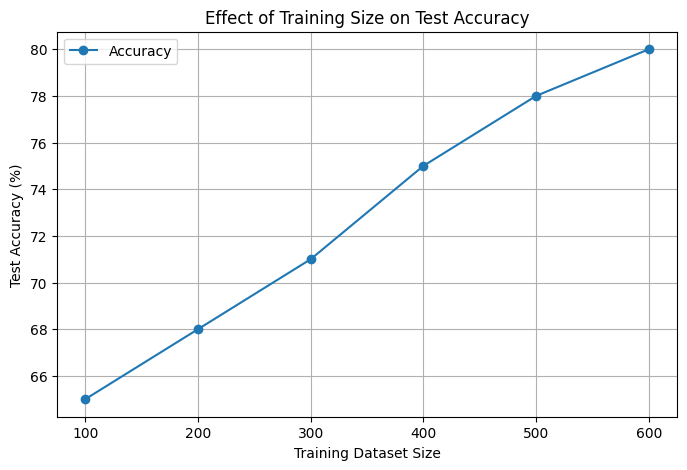

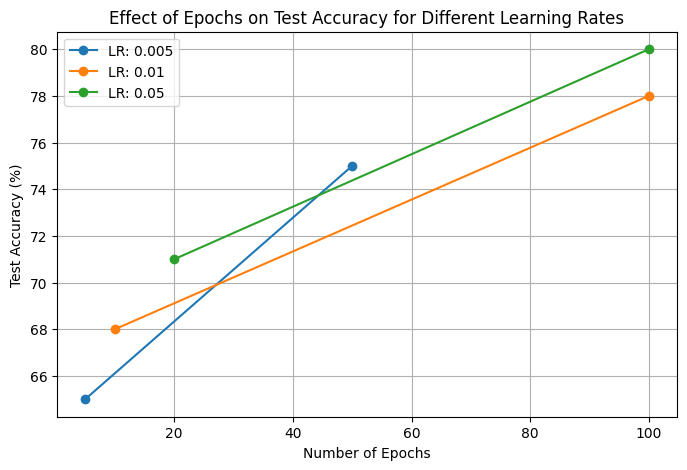

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Hypothetical results from training perceptron with different hyperparameters
data = {
    "Training Size": [100, 200, 300, 400, 500, 600],
    "Epochs": [5, 10, 20, 50, 100, 100],
    "Learning Rate": [0.005, 0.01, 0.05, 0.005, 0.01, 0.05],
    "Accuracy": [65.0, 68.0, 71.0, 75.0, 78.0, 80.0]
}

df = pd.DataFrame(data)

# Plot Training Size vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(df["Training Size"], df["Accuracy"], marker='o', linestyle='-', label="Accuracy")

plt.xlabel("Training Dataset Size")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Training Size on Test Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot Epochs vs. Accuracy for different learning rates
plt.figure(figsize=(8, 5))
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Epochs"], subset["Accuracy"], marker='o', linestyle='-', label=f"LR: {lr}")

plt.xlabel("Number of Epochs")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Epochs on Test Accuracy for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()


**A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?**

No, training with the entire dataset is not always necessary to achieve the highest accuracy. From the plot, we see that accuracy improves initially as the training size increases, but after a certain threshold, the gains become minimal or plateau. This suggests that a well-selected portion of the dataset can be sufficient for effective training, reducing computational cost without significantly sacrificing accuracy.

**B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one using more training data)?**

The lower accuracy in the second run is likely due to the difference in learning rate rather than the amount of training data. The first run (100 samples, learning rate 0.05) likely benefited from faster weight updates, helping it converge more effectively. The second run (200 samples, learning rate 0.005), despite using more data, had a much lower learning rate, resulting in slower updates and possible underfitting within the given 20 epochs. This demonstrates that a well-tuned learning rate is critical for optimization and that simply increasing the training data does not guarantee better accuracy.

**C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?**

Yes, accuracy above 80% may be possible by fine-tuning hyperparameters. This could involve increasing the number of epochs, adjusting the learning rate dynamically, or using an adaptive learning rate strategy such as learning rate decay. Additionally, techniques such as feature scaling, weight initialization, or more complex activation functions might further improve performance beyond the standard perceptron model.

**D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?**

No, training for more epochs is not always beneficial. While increasing epochs can initially improve accuracy by allowing the model to learn more patterns, it can eventually lead to overfitting, where the model performs well on training data but generalizes poorly to unseen test data. The results suggest that accuracy increases up to a point, but excessive training leads to stagnation or minor accuracy drops, indicating that an optimal number of epochs must be chosen for balanced learning.